In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

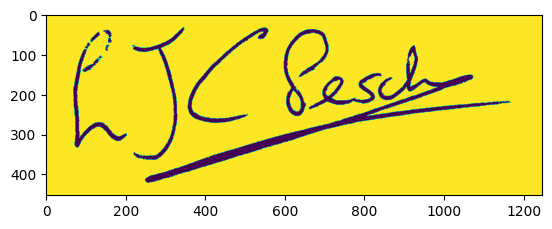

In [2]:
img = plt.imread(r'C:\Users\Rohit94\Documents\project_2023\Signtaure forgery\archive (2)\sample_Signature/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

In [4]:
img.shape

(453, 1247)

In [ ]:
img1 = plt.imread(r'C:\Users\Rohit94\Documents\project_2023\Signtaure forgery\archive (2)\sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

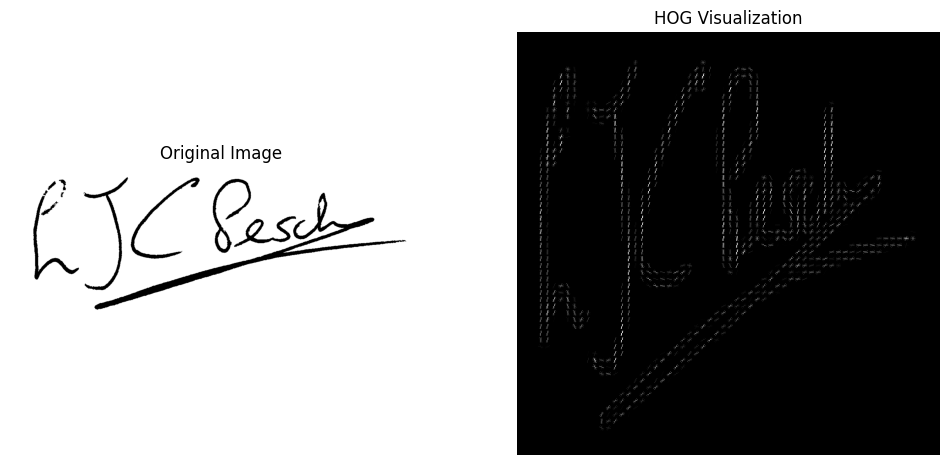

In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

def visualize_hog(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to a smaller size (e.g., (224, 224))
    resized_image = cv2.resize(image, (500,500))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

    # Compute HOG features and visualize them
    # Modify parameters as per your requirements
    hog_features, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2), visualize=True)

    # Plot the original image and HOG visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.axis('off')

    plt.show()

# Replace 'path/to/your/image.jpg' with the path to your image file
image_path = r'C:\Users\Rohit94\Documents\project_2023\Signtaure forgery\archive (2)\sample_Signature/sample_Signature/forged/NFI-00301001.png'
visualize_hog(image_path)


In [15]:
import glob
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [20]:
def compute_hog_features(image_list):
    hog_features = []
    for image in image_list:
        # Resize the image to a smaller size (e.g., (224, 224))
        resized_image = cv2.resize(image, (224, 224))
        # Convert the resized image to grayscale
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
        # Compute HOG features for each image
        # Modify parameters as per your requirements
        fd, _ = hog(gray_image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return np.array(hog_features)

In [21]:
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(folder + '/*.*'):
        image = cv2.imread(filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return images

In [22]:
gen_folder = r'C:\Users\Rohit94\Documents\project_2023\Signtaure forgery\archive (2)\Dataset_Signature_Final\new datasest\real'
forg_folder = r'C:\Users\Rohit94\Documents\project_2023\Signtaure forgery\archive (2)\Dataset_Signature_Final\new datasest\forge'

In [23]:
# Load genuine and forged signature images from folders
gen_images = load_images_from_folder(gen_folder)
forg_images = load_images_from_folder(forg_folder)

In [24]:
# Combine genuine and forged signature images
all_images = np.array(gen_images + forg_images)

C:\Users\Rohit94\AppData\Local\Temp\ipykernel_9524\374285872.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_images = np.array(gen_images + forg_images)


In [25]:
# Create labels for the genuine and forged signatures
gen_labels = np.zeros(len(gen_images))
forg_labels = np.ones(len(forg_images))
all_labels = np.concatenate((gen_labels, forg_labels), axis=0)

In [26]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)


In [27]:
# Compute HOG features for train and test data
train_hog_features = compute_hog_features(train_data)
test_hog_features = compute_hog_features(test_data)

In [34]:
# Create the CNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_hog_features.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_hog_features, train_labels, epochs=30, batch_size=10, validation_split=0.2)

# Evaluate the model on the testing dataset
loss, accuracy = model.evaluate(test_hog_features, test_labels)
print(f'Test accuracy: {accuracy}')

Epoch 1/30
33/33 [==============================] - 1s 12ms/step - loss: 0.7897 - accuracy: 0.5882 - val_loss: 0.6579 - val_accuracy: 0.6790
Epoch 2/30
33/33 [==============================] - 0s 8ms/step - loss: 0.4842 - accuracy: 0.8019 - val_loss: 0.5910 - val_accuracy: 0.7037
Epoch 3/30
33/33 [==============================] - 0s 10ms/step - loss: 0.2442 - accuracy: 0.8947 - val_loss: 0.5060 - val_accuracy: 0.7531
Epoch 4/30
33/33 [==============================] - 0s 9ms/step - loss: 0.1030 - accuracy: 0.9598 - val_loss: 0.4338 - val_accuracy: 0.7654
Epoch 5/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.4160 - val_accuracy: 0.8148
Epoch 6/30
33/33 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.4275 - val_accuracy: 0.8148
Epoch 7/30
33/33 [==============================] - 0s 10ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4360 - val_accuracy: 0.8148
Epoch 8/30
33/33 

4/4 [==============================] - 0s 2ms/step


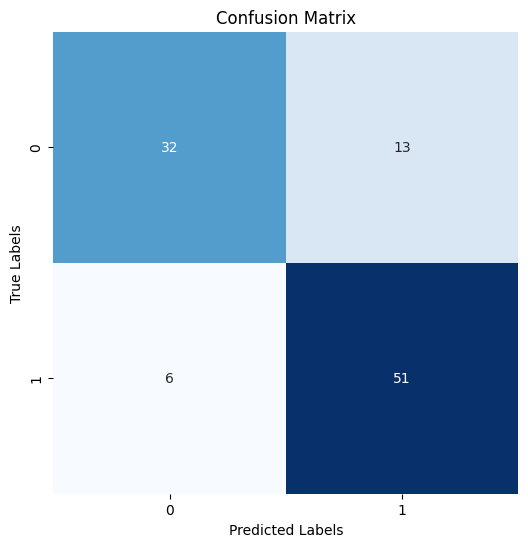

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77        45
         1.0       0.80      0.89      0.84        57

    accuracy                           0.81       102
   macro avg       0.82      0.80      0.81       102
weighted avg       0.82      0.81      0.81       102



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt  


test_probabilities = model.predict(test_hog_features)

# Convert probabilities to binary predictions using a threshold (0.5)
test_predictions = (test_probabilities > 0.5).astype(int).flatten()

# Create the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Create the classification report
cls_report = classification_report(test_labels, test_predictions)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(cls_report)